In [ ]:
                                                    APPLIED DATA SCIENCE WITH PYTHON
                                                      (AUS APPAREL SALES ANALYSIS)

In [ ]:
#Importing the libraries.

In [8]:
import pandas as pd 

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Importing a csv file

In [14]:
apparel_sales=pd.read_csv(r"C:\Users\Admin\Downloads\1709645788_ausapparalsales4thqrt2020 (1)\AusApparalSales4thQrt2020.csv")

In [15]:
apparel_sales.head(100)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
95,2-Oct-2020,Evening,WA,Seniors,6,15000
96,2-Oct-2020,Morning,NT,Kids,5,12500
97,2-Oct-2020,Morning,NT,Men,13,32500
98,2-Oct-2020,Morning,NT,Women,13,32500


In [16]:
#Using decsribe function to find min,max,25th%,75%)

In [17]:
apparel_sales.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [18]:
# info=====>to know about the datatype,no.of values,no.of non-null values.

In [19]:
apparel_sales.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [20]:
#Converting date to datetime to extract monthname,day and year.

In [21]:
apparel_sales['Date'] = pd.to_datetime(apparel_sales['Date'])

In [22]:
apparel_sales['Month']=apparel_sales['Date'].dt.month_name()


In [23]:
apparel_sales['Day']=apparel_sales['Date'].dt.day_name()

In [24]:
apparel_sales['Year']=apparel_sales['Date'].dt.year

In [25]:
apparel_sales

,Date,Time,State,Group,Unit,Sales,Month,Day,Year
0,2020-10-01,Morning,WA,Kids,8,20000,October,Thursday,2020
1,2020-10-01,Morning,WA,Men,8,20000,October,Thursday,2020
2,2020-10-01,Morning,WA,Women,4,10000,October,Thursday,2020
3,2020-10-01,Morning,WA,Seniors,15,37500,October,Thursday,2020
4,2020-10-01,Afternoon,WA,Kids,3,7500,October,Thursday,2020
...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,December,Wednesday,2020
7556,2020-12-30,Evening,TAS,Kids,15,37500,December,Wednesday,2020
7557,2020-12-30,Evening,TAS,Men,15,37500,December,Wednesday,2020
7558,2020-12-30,Evening,TAS,Women,11,27500,December,Wednesday,2020


In [ ]:
##Checking for null values using isna().

In [89]:
apparel_sales.isna().sum()


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
Month    0
Day      0
Year     0
dtype: int64

In [ ]:
#Using boxplot method to find outliers.

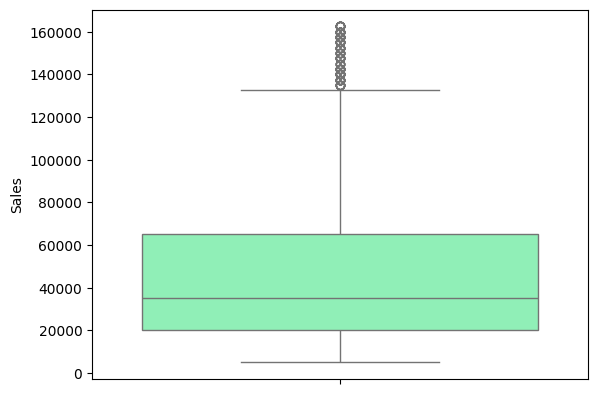

In [90]:
sns.boxplot(y='Sales',data=apparel_sales,palette='rainbow')
plt.show()



In [ ]:
#Treating outliers.

In [91]:
Q1 = apparel_sales['Sales'].quantile(0.25)
Q3 = apparel_sales['Sales'].quantile(0.75)
IQR = Q3-Q1
print(IQR)



45000.0


In [92]:
apparel_sales = apparel_sales[~((apparel_sales.Sales<(Q1 - 1.5*IQR))|(apparel_sales.Sales>(Q3 + 1.5*IQR)))]

In [42]:
apparel_sales_no_outlier = apparel_sales[((apparel_sales.Sales<(Q1 - 1.5*IQR))&(apparel_sales.Sales>(Q3 + 1.5*IQR)))]

In [ ]:
#Checking the treated outlier through boxplot.

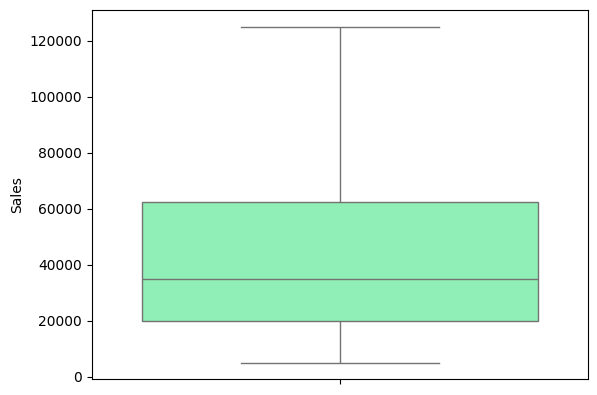

In [43]:
sns.boxplot(y='Sales',data=apparel_sales,palette='rainbow')
plt.show()

In [ ]:
# SALES ANALYSIS 
# using groupby()

In [93]:
apparel_sales.groupby('Group')['Sales'].max()

##Groupwise maximum sales.

Group
Kids       132500
Men        132500
Seniors    130000
Women      132500
Name: Sales, dtype: int64

In [94]:
apparel_sales.groupby('Group')['Sales'].min()

##Groupwise minimum sales.

Group
Kids       5000
Men        5000
Seniors    5000
Women      5000
Name: Sales, dtype: int64

In [96]:
apparel_sales.groupby('State')['Sales'].max()

##statewise maximum sales.    A state with maximum sales is VIC.

State
NSW    112500
NT      37500
QLD     62500
SA      87500
TAS     37500
VIC    132500
WA      37500
Name: Sales, dtype: int64

In [97]:
apparel_sales.groupby('State')['Sales'].min()

##statewise minimum sales.

State
NSW    30000
NT      5000
QLD     7500
SA     25000
TAS     5000
VIC    50000
WA      5000
Name: Sales, dtype: int64

In [ ]:
# state - wise sales analysis boxplot.

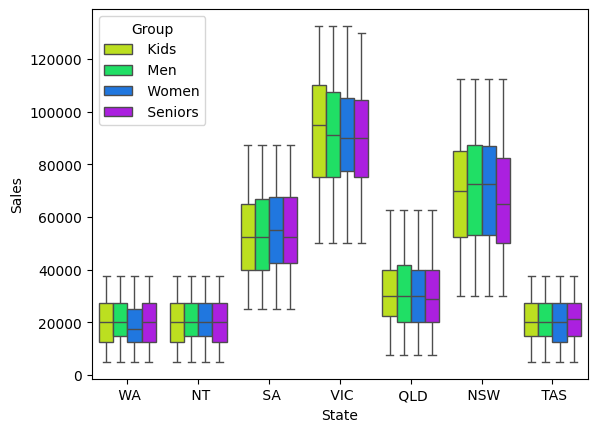

In [98]:
sns.boxplot(x='State',y='Sales',data=apparel_sales,palette='hsv',hue='Group')
plt.show()

In [ ]:
# Group - wise sales analysis boxplot.

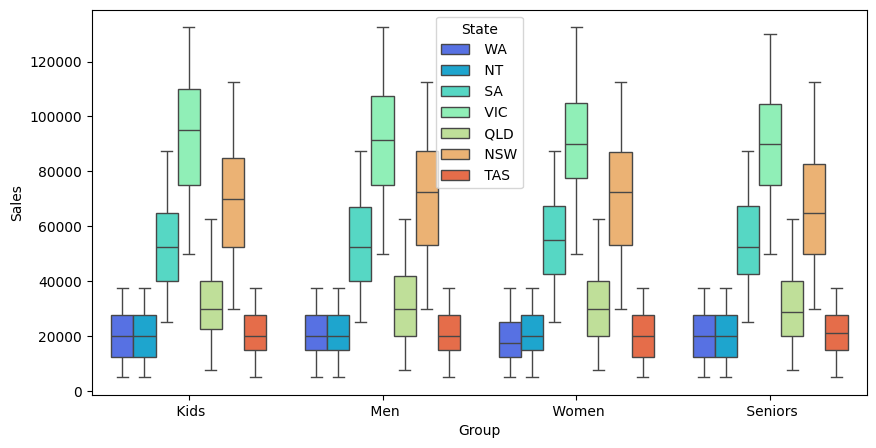

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Group',y='Sales',data=apparel_sales,palette='rainbow',hue='State')
plt.show()

In [100]:
time_wise_sales=apparel_sales.groupby('Time')['Sales'].sum()
time_wise_sales




# Total sales according to each time stamp.   MORNING HAS MAXIMUM SALES AND EVENING HAS MINIMUM SALES.

Time
Afternoon    107175000
Evening      106125000
Morning      108667500
Name: Sales, dtype: int64

In [101]:
apparel_sales.groupby('Time')['Sales'].max()
#Maximum sales according to each time of the day.

Time
Afternoon    132500
Evening      132500
Morning      132500
Name: Sales, dtype: int64

In [102]:
apparel_sales.groupby('Time')['Sales'].min()
#Minimum sales according to each time of the day.

Time
Afternoon    5000
Evening      5000
Morning      5000
Name: Sales, dtype: int64

In [ ]:
VISUALISATION:

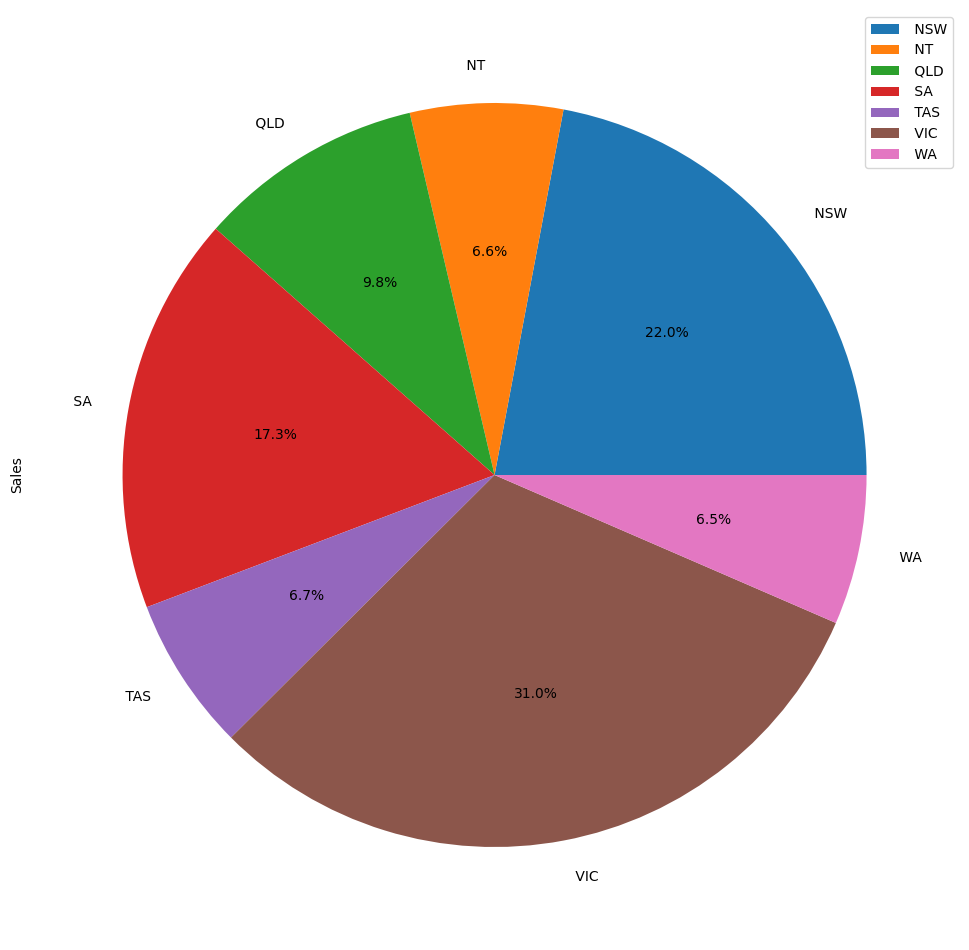

In [29]:
#Pie-chart for visualising statewise sales.
plt.figure(figsize=(12,15))
Group_sales = apparel_sales.groupby("State")["Sales"].sum().plot(kind='pie',autopct='%0.1f%%',legend=True)

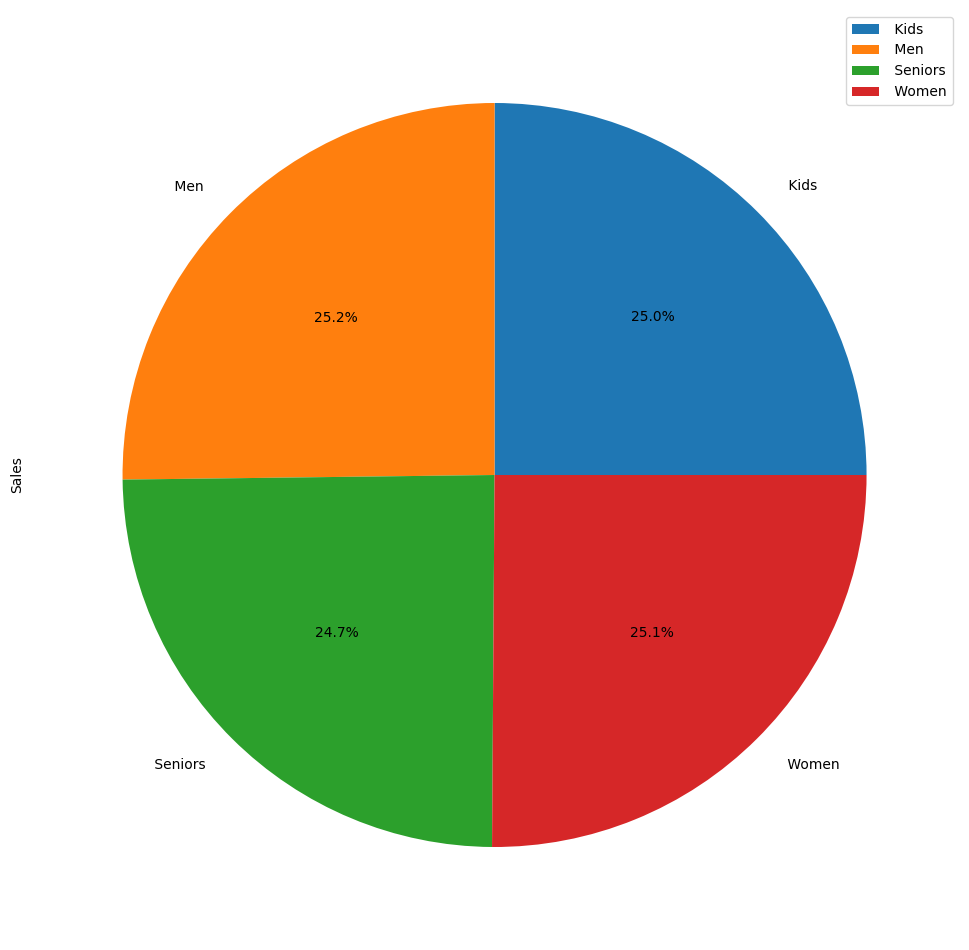

In [27]:
#Pie-chart for visualising groupwise sales.
plt.figure(figsize=(12,15))
Group_sales = apparel_sales.groupby("Group")["Sales"].sum().plot(kind='pie',autopct='%0.1f%%',legend=True)

In [ ]:
#Checking for duplicate values.

In [104]:
apparel_sales.duplicated().sum()

0

In [105]:
apparel_sales[apparel_sales.duplicated()==True]

,Date,Time,State,Group,Unit,Sales,Month,Day,Year


In [106]:
apparel_sales.drop_duplicates(inplace=True)

In [107]:
apparel_sales.duplicated().sum()

0

In [110]:
apparel_sales['Date']=pd.to_datetime(apparel_sales['Date'])
print (apparel_sales['Date'].dtype)

datetime64[ns]


In [ ]:
# Day-wise-sales.

<Axes: title={'center': 'Day-wise-analysis'}, xlabel='Day'>

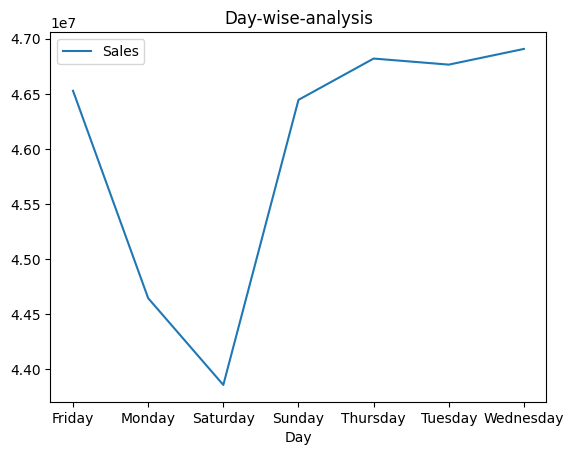

In [128]:
 daily_sales = apparel_sales.groupby('Day')['Sales'].sum().plot(x='Day',y='Sales',title='Day-wise-analysis',legend=True)
 daily_sales


In [ ]:
# Monthly-sales.

<Axes: xlabel='Month'>

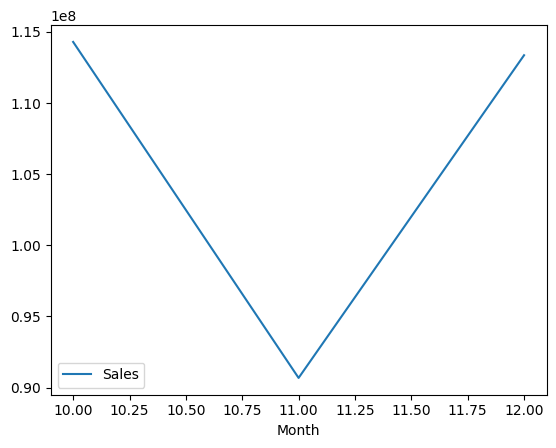

In [56]:
monthly_sales = apparel_sales.groupby('Month')['Sales'].sum().plot(x='Month',y='Sales',legend=True)
monthly_sales

In [ ]:
#Weekly sales.

<Axes: title={'center': 'weekly analysis'}, xlabel='Date'>

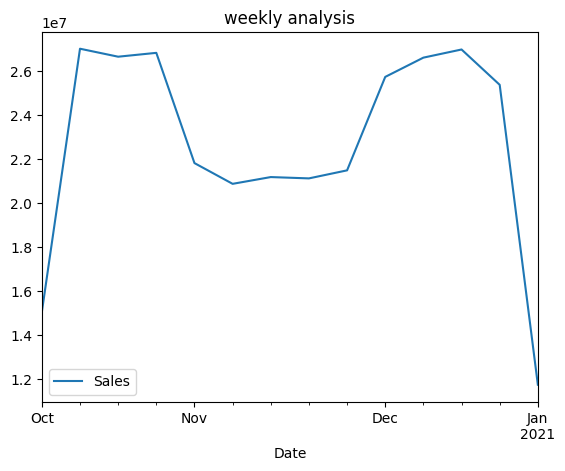

In [61]:
apparel_sales['week'] = pd.to_datetime(apparel_sales['Date']) - pd.to_timedelta(7, unit='d')

#calculate sum of values, grouped by week
apparel_sales.groupby([pd.Grouper(key='Date', freq='W')])['Sales'].sum().plot(y='Sales',title='weekly analysis',legend=True)

In [120]:
apparel_sales.reset_index(inplace=True)

In [121]:
apparel_sales

,Date,Time,State,Group,Unit,Sales,Month,Day,Year
0,2020-10-01,Morning,WA,Kids,8,20000,October,Thursday,2020
1,2020-10-01,Morning,WA,Men,8,20000,October,Thursday,2020
2,2020-10-01,Morning,WA,Women,4,10000,October,Thursday,2020
3,2020-10-01,Morning,WA,Seniors,15,37500,October,Thursday,2020
4,2020-10-01,Afternoon,WA,Kids,3,7500,October,Thursday,2020
...,...,...,...,...,...,...,...,...,...
7432,2020-12-30,Afternoon,TAS,Seniors,14,35000,December,Wednesday,2020
7433,2020-12-30,Evening,TAS,Kids,15,37500,December,Wednesday,2020
7434,2020-12-30,Evening,TAS,Men,15,37500,December,Wednesday,2020
7435,2020-12-30,Evening,TAS,Women,11,27500,December,Wednesday,2020


In [ ]:
#Finding no.of days.

In [122]:
apparel_sales['Date'].min(), apparel_sales['Date'].max()

(Timestamp('2020-10-01 00:00:00'), Timestamp('2020-12-30 00:00:00'))

In [123]:
apparel_sales['Date'].max() - apparel_sales['Date'].min()

Timedelta('90 days 00:00:00')

In [125]:
apparel_sales.Date = pd.to_datetime(apparel_sales.Date)
apparel_sales.set_index('Date', inplace=True)

In [ ]:
#Quarterly sales.

<Axes: xlabel='Date'>

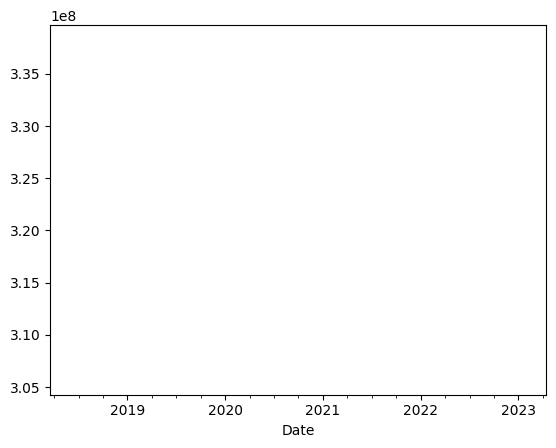

In [138]:
apparel_sales.resample('QS')['Sales'].sum().plot() 
#As the data is not given for year the quarterly plot is empty.